<a href="https://colab.research.google.com/github/aleyna-cihangir/Intro_to_ML/blob/main/KNN%20-%20Pima%20Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Classification-KNN

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()

%matplotlib inline
#import warnings
#warnings.filterwarnings('ignore')

**OSEMN Pepline :**

- **O** = Obtaining our data
- **S** = Scrubbing / Cleaning our data
- **E** = Exploring / Visualizing our data will allow us to find patterns and trends
- **M** = Modeling our data will give us our predictive power as a wizard
- **N** = Interpreting our data


dataset : https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [4]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [9]:
d_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
d_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
# loading dataset
d_data = pd.read_csv('diabetes.csv')
d_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
# first, is the minimum value of these columns zero? I need to check. : Glucose, BloodPressure, SkinThickness, Insulin, BMI
d_data_copy = d_data.copy()

# write np.Nan where it sees 0. "Yapay_Zeka_ve_Veri_Bilimi_Notları"
d_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = d_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
d_data_copy.isnull().sum() 

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

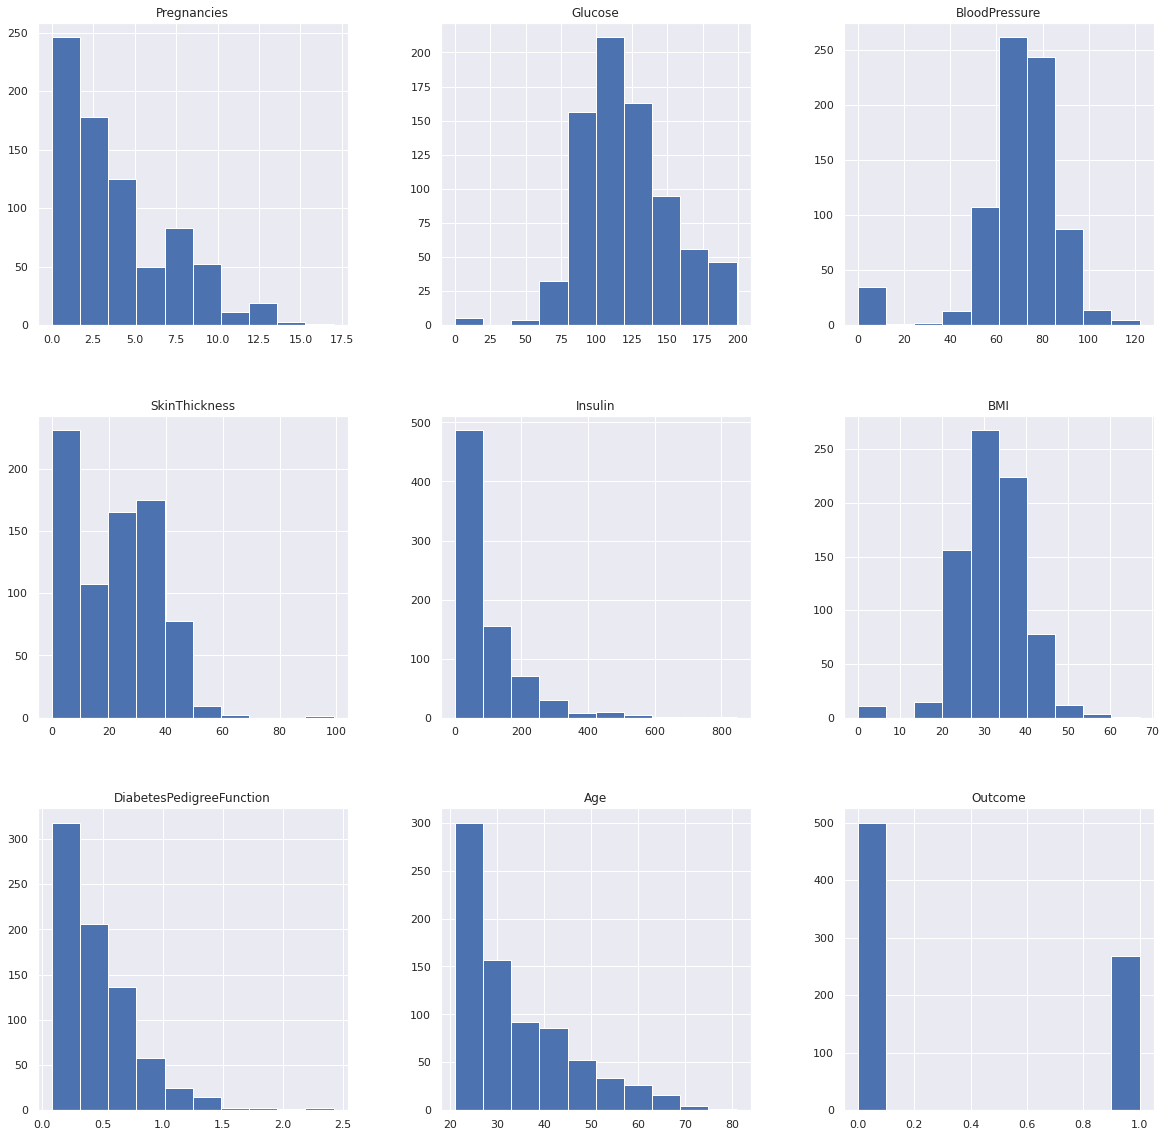

In [16]:
p = d_data.hist(figsize = (20,20))

In [17]:
d_data_copy['Glucose'].fillna(d_data_copy['Glucose'].mean(), inplace = True)
d_data_copy['BloodPressure'].fillna(d_data_copy['BloodPressure'].mean(), inplace = True)
d_data_copy['SkinThickness'].fillna(d_data_copy['SkinThickness'].median(), inplace = True)
d_data_copy['Insulin'].fillna(d_data_copy['Insulin'].median(), inplace = True)
d_data_copy['BMI'].fillna(d_data_copy['BMI'].median(), inplace = True)

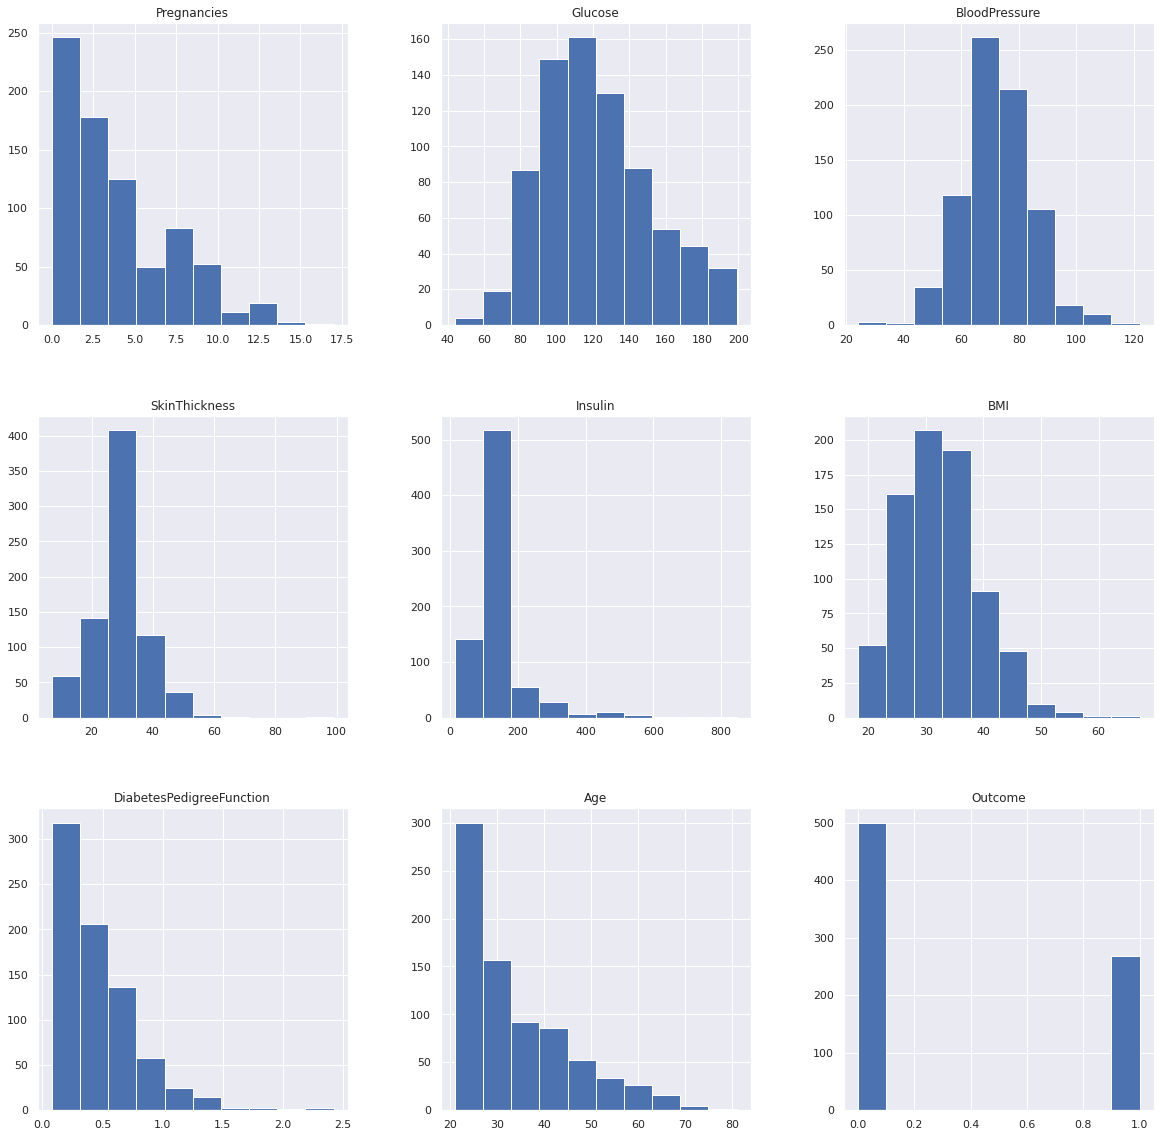

In [19]:
p = d_data_copy.hist(figsize = (20,20))

In [23]:
d_data.shape

(768, 9)

https://github.com/aleyna-cihangir/Seaborn_Library_Notes/blob/main/Seaborn_Notes.ipynb

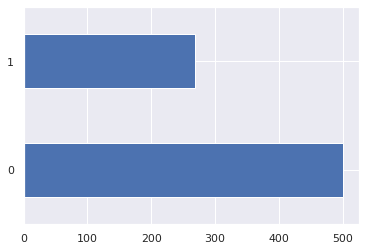

In [28]:
d_data["Outcome"].value_counts().plot.barh();

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables

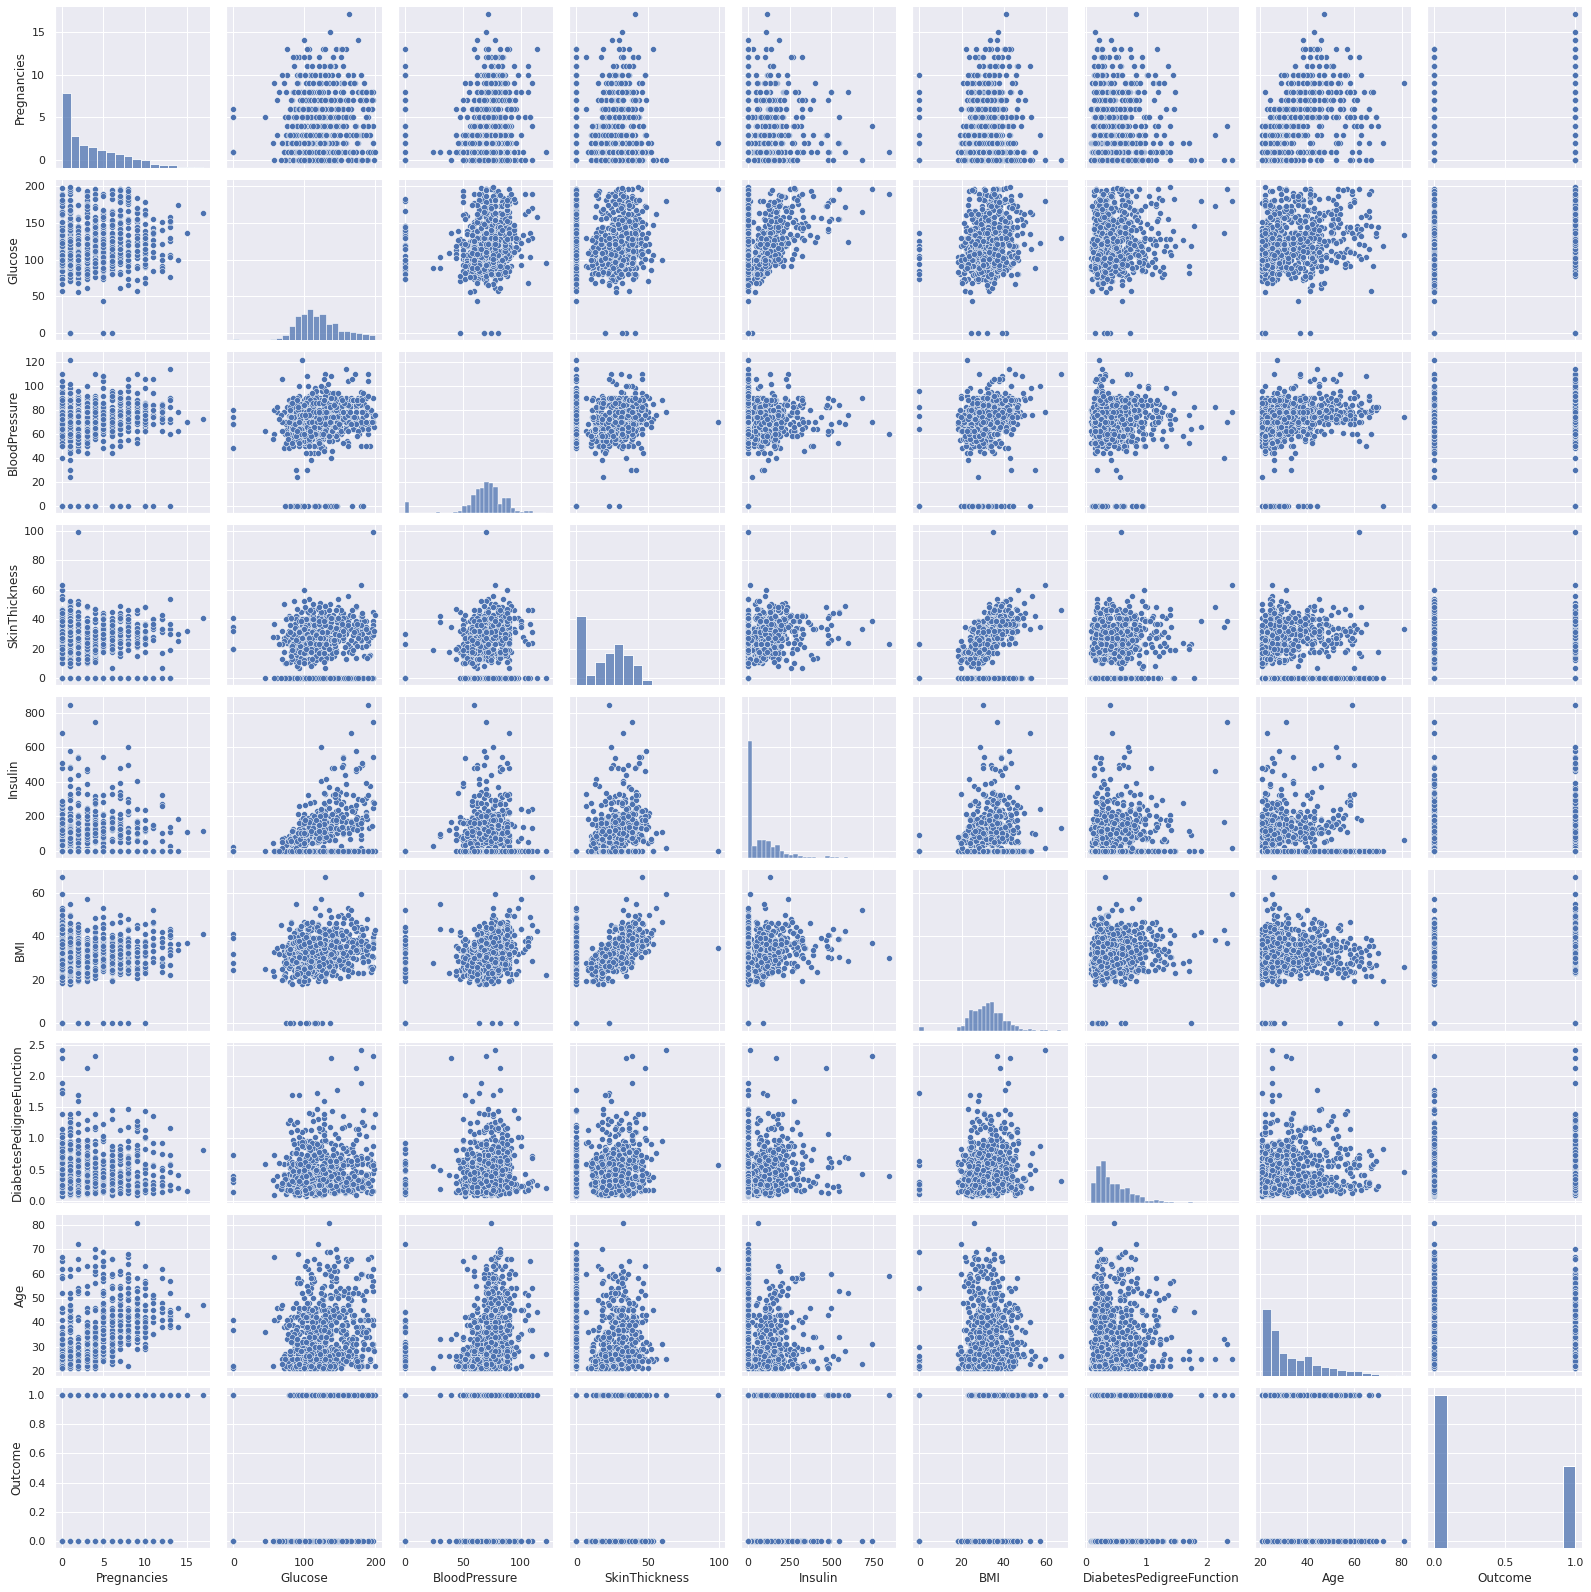

In [29]:
sns.pairplot(d_data);

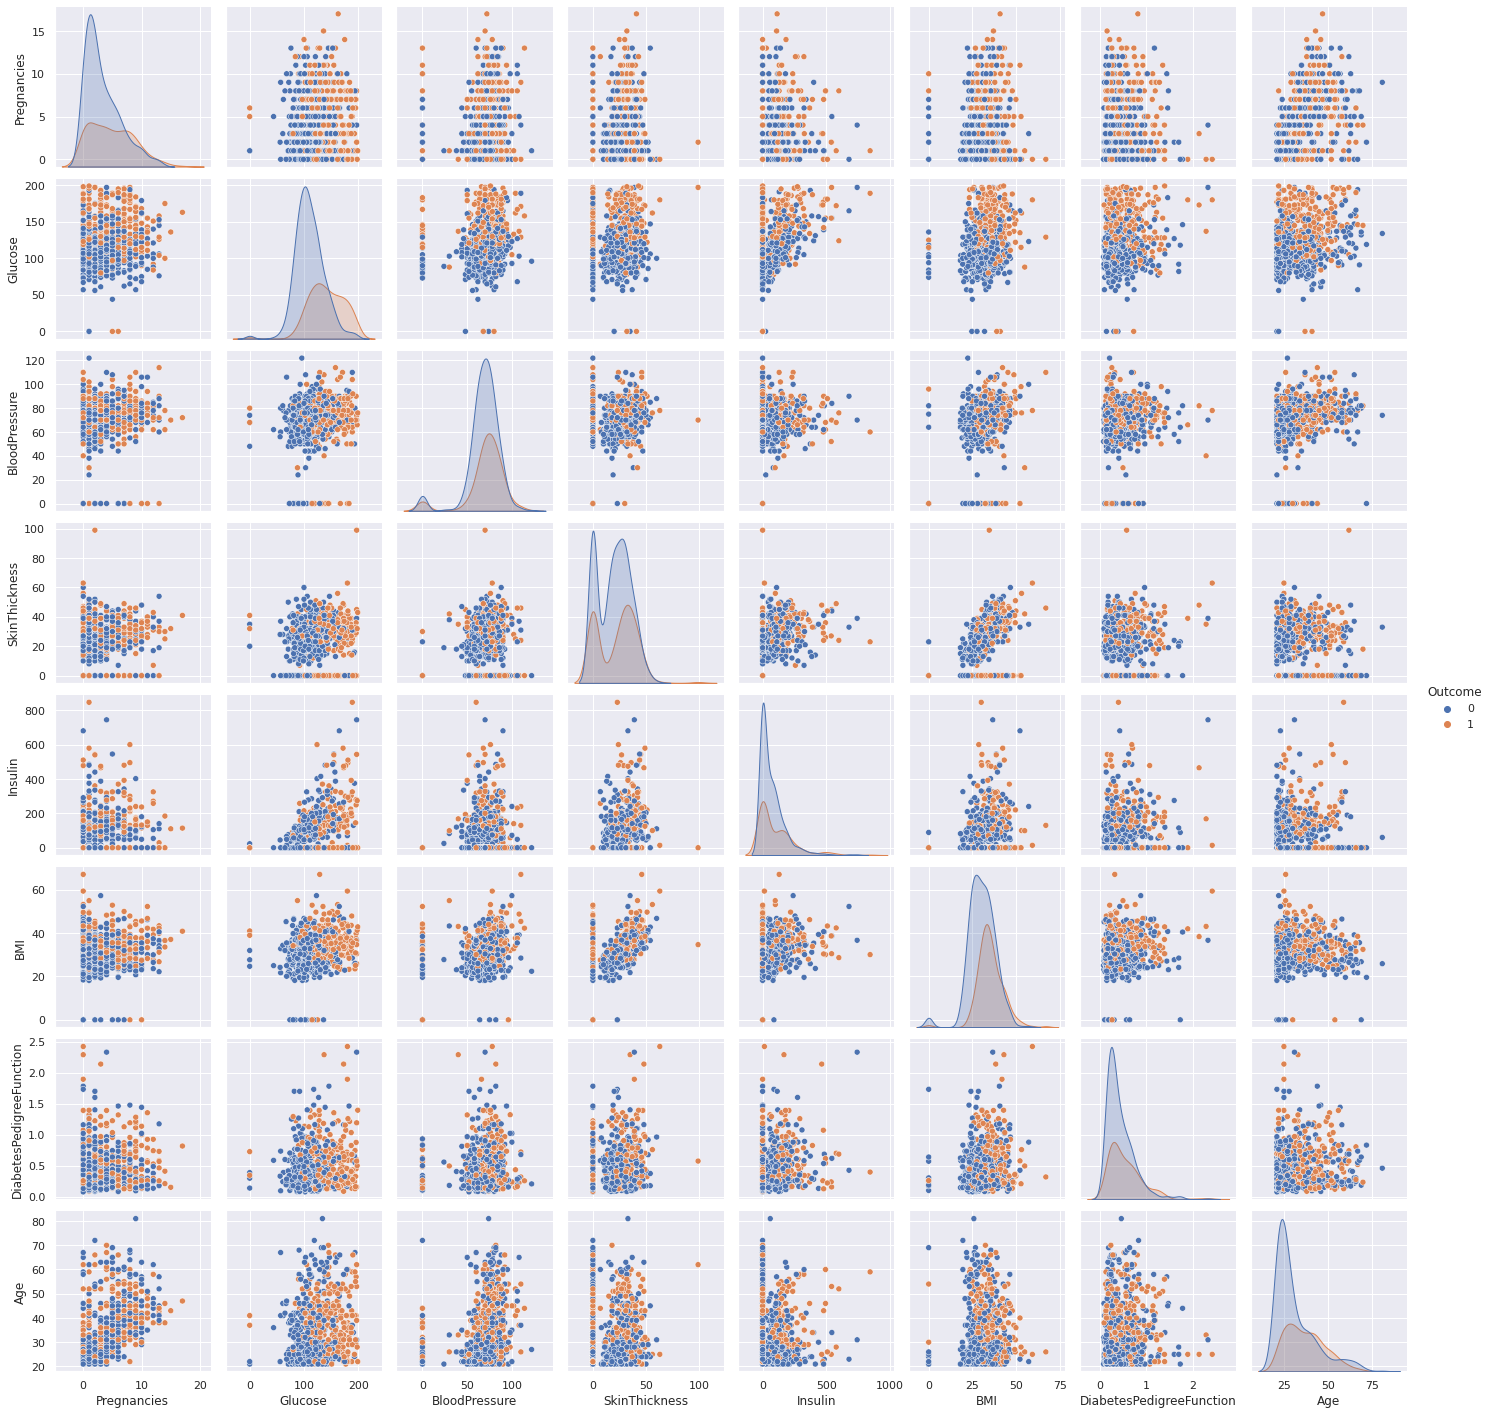

In [32]:
sns.pairplot(d_data, hue="Outcome");

We can imagine how the feature with greater range with overshadow or dimenish the smaller feature completely and this will impact the performance of all distance based model as it will give higher weightage to variables which have higher magnitude.

In [38]:
# scaling the data

sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(d_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head() 
Y = d_data_copy.Outcome

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=42, stratify=Y) # stratify : tabakalaşma 

In [44]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train, Y_train)
    
    train_scores.append(knn.score(X_train, Y_train))
    test_scores.append(knn.score(X_test, Y_test)) 

In [45]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100, list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [46]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.5625 % and k = [11]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


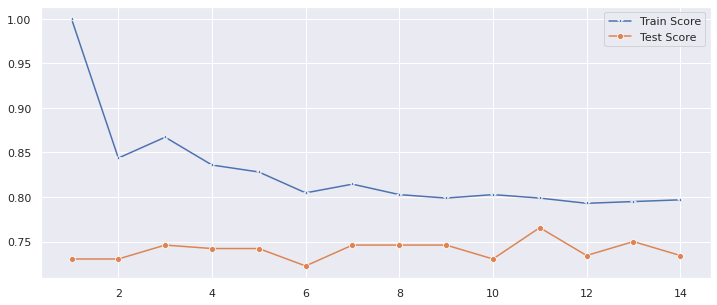

In [55]:
plt.figure(figsize=(12,5))
sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [57]:
knn = KNeighborsClassifier(11)

knn.fit(X_train, Y_train)
knn.score(X_test, Y_test) 

0.765625

????

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:313: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **scatter_highlight_kwargs)


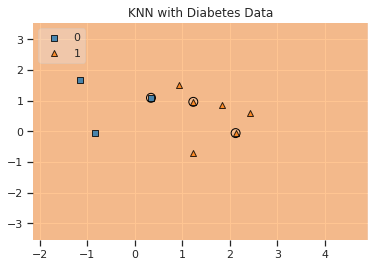

In [60]:
value = 20000
width = 20000
plot_decision_regions(X.values, Y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations
plt.title('KNN with Diabetes Data')
plt.show()

In [62]:
y_pred = knn.predict(X_test)
confusion_matrix(Y_test, y_pred)
pd.crosstab(Y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,142,25,167
1,35,54,89
All,177,79,256


In [80]:
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



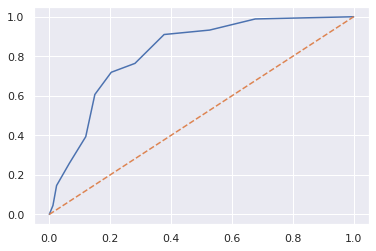

In [78]:
# ROC : 

y_pred_a = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_a)
plt.plot(fpr,tpr, label='Knn')
plt.plot([0,1],[0,1],'--')
plt.show()